Импортируем модули

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Запишем логистическую функцию

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

переносим шаблон и заполняем его

In [12]:
def log_loss(w, X, y):
    # здесь должны быть рассчитаны параметры градиента и значение функции потерь
    m = X.shape[0]
    z = X @ w
    y_hat = sigmoid(z)
    epsilon = 1e-15
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
    loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    grad = X.T @ (y_hat - y) / m
    return loss, grad

def optimize(w, X, y, n_iterations, eta):
    # потери будем записывать в список для отображения в виде графика
    losses = []
    for i in range(n_iterations):
        loss, grad = log_loss(w, X, y)
        w -= eta * grad
        losses.append(loss)
    return w, losses

def predict(w, X, b=0.5):
    probs = sigmoid(X @ w)
    return (probs >= b).astype(int)

Сгенерируем данные и отобразим их на графике

In [13]:

np.random.seed(0)
n_samples = 100
X = np.random.randn(n_samples, 2)
true_w = np.array([2, -3])
y = (1 / (1 + np.exp(-(X @ true_w + 0.5))) > 0.5).astype(int)

# Добавим bias
X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])
w_init = np.zeros(X_with_bias.shape[1])


Обучение модели

In [14]:
w_trained, losses = optimize(w_init, X_with_bias, y, n_iterations=1000, eta=0.1)


График функции потерь

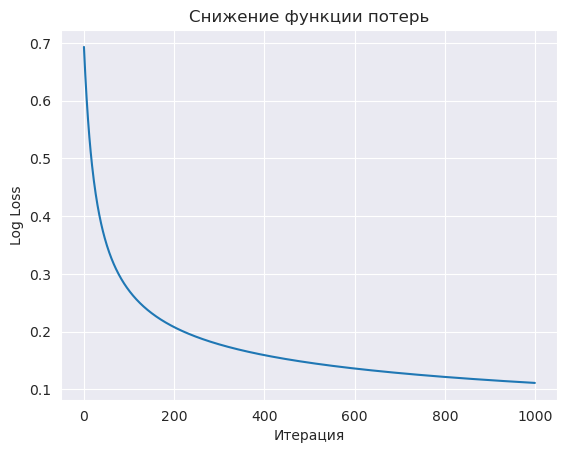

In [15]:
plt.plot(losses)
plt.xlabel("Итерация")
plt.ylabel("Log Loss")
plt.title("Снижение функции потерь")
plt.grid(True)
plt.show()


Оценка точности модели

In [16]:
y_pred = predict(w_trained, X_with_bias)
accuracy = np.mean(y_pred == y)
print(f"Точность: {accuracy:.4f}")

Точность: 1.0000


Ответы на доп вопросы

1. Как влияет размер шага (eta) на сходимость алгоритма? 
Слишком маленький eta замедляет обучение. Слишком большой — может привести к расходимости градиентного спуска.
2. Что произойдет, если выбрать слишком маленькое или слишком большое количество итераций (n_iterations)? 
Мало итераций — модель не обучится. Слишком много — потеря времени, возможно переобучение.
3. Почему логистическая регрессия подходит только для задач бинарной классификации? 
Потому что сигмоидная функция выдает вероятность только одного класса. Для многоклассовой классификации применяется softmax.
